## 參考連結

1. [Graph: Breadth-First Search(BFS，廣度優先搜尋) by Chiu CC](http://alrightchiu.github.io/SecondRound/graph-breadth-first-searchbfsguang-du-you-xian-sou-xun.html)
2. [Graph: Depth-First Search(DFS，深度優先搜尋) by Chiu CC](http://alrightchiu.github.io/SecondRound/graph-depth-first-searchdfsshen-du-you-xian-sou-xun.html)
3. [BFS 廣度優先搜尋法](http://simonsays-tw.com/web/DFS-BFS/BreadthFirstSearch.html)
4. [DFS 深度優先搜尋法](http://simonsays-tw.com/web/DFS-BFS/DepthFirstSearch.html)
5. [深度優先搜尋(DFS)和廣度優先搜尋(BFS)演算法，實用的節點搜尋法](https://magiclen.org/dfs-bfs/)
6. [演算法時間複雜度整理](https://tingtseng.pixnet.net/blog/post/39924871-algorithm-time-complexity-%E6%BC%94%E7%AE%97%E6%B3%95%E6%99%82%E9%96%93%E8%A4%87%E9%9B%9C%E5%BA%A6%E6%95%B4%E7%90%86)
7. [之前寫的Stack和Queue](https://github.com/mandy331/Data-Structure_PythonNote/blob/master/Week2/Stack%26Queue%E5%AD%B8%E7%BF%92%E6%AD%B7%E7%A8%8B%26%E6%B5%81%E7%A8%8B%E5%9C%96.ipynb)

## Breadth First Search Introduction

Breadth First Search簡稱BFS，中文是廣度優先搜尋，廣義上就像是BST用Level-Order Traversal，順序是Root->Left->Right後再往下層，而BFS就是將Level-Order Traversal的使用情境從Tree換至Graph。

BFS是從圖的某一點(Nodes或Vertex)開始走訪，接著走訪這一節點的所有且尚未訪問的鄰點，再由這些走訪過的節點進行先廣後深的搜尋。
以Tree的角度來看的話就是，先從Root開始，將每一個Level的都先拜訪完後，再繼續向下一個深度搜尋，直到找到目的節點或遍尋全部節點。

廣度優先搜尋法利用佇列(Queue)來處理，通常是以迴圈的方式呈現。

## BFS流程圖

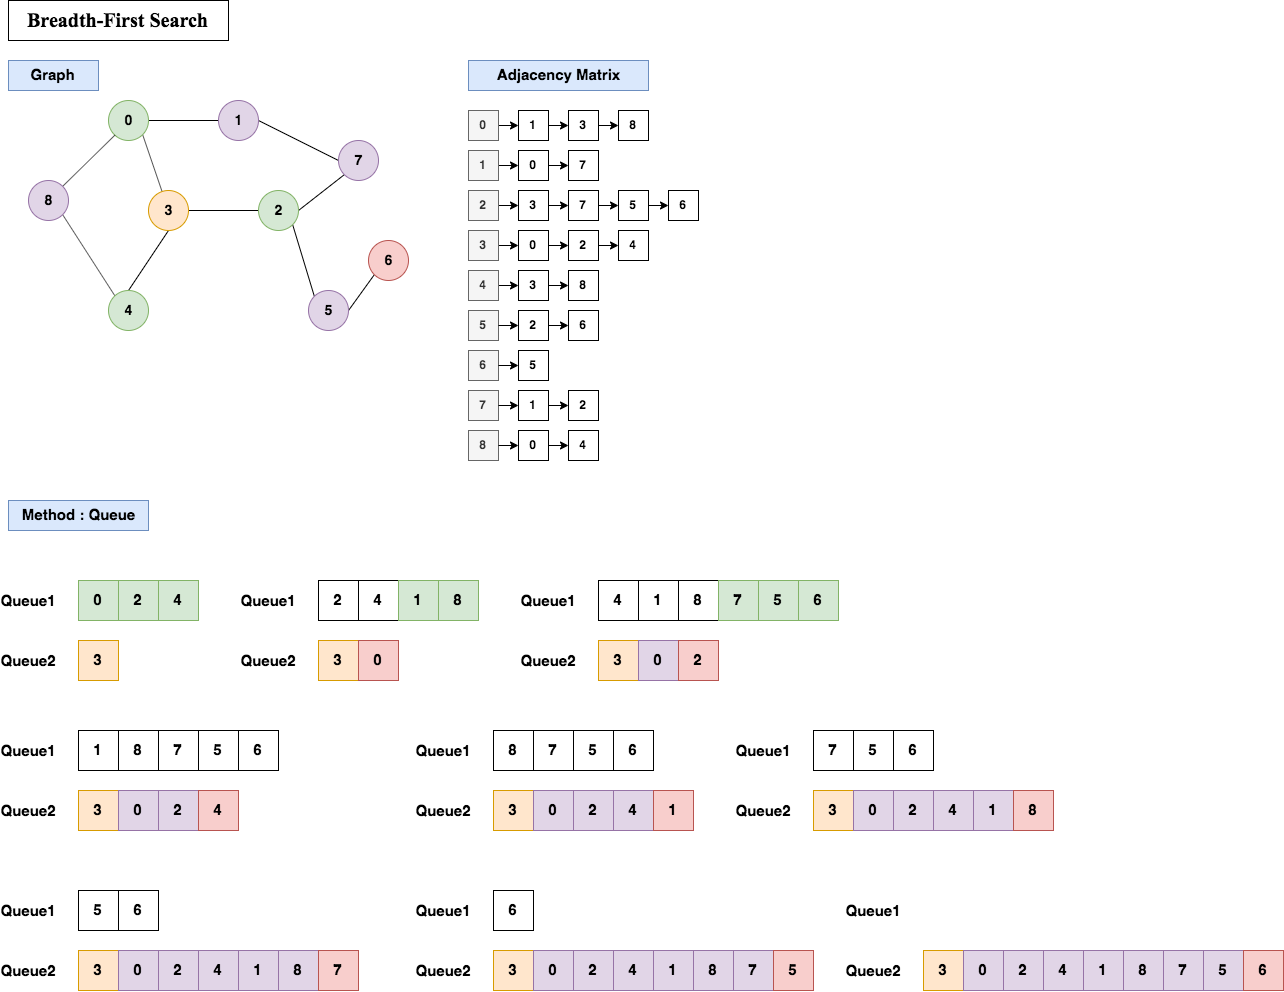

In [1]:
from IPython.display import Image
Image(filename = "BFS.png", height = 1000, width = 1500)

## 我對BFS的想法：

1. 以Queue實現對於每個點的走訪。
2. 設計兩個Queue:
    + Queue1: 暫存即將走訪的Node。
    + Queue2: 儲存已走訪過的Node，且預設第一個是起點。
3. 邏輯:
    + 起點加入Queue2。
    + 查看和起點有直接連接的Node，並加入Queue1。
        + 將Queue1的第一個加入Queue2，並從Queue1移除。
        + 查看和Queue1的第一個有直接連接的Node，有且從未走訪過的Node，加入Queue1。
        + 不斷重複，直到Queue1沒有Node。
4. 重點在於：
    + 每次都是將Queue1的第一個加入Queue2，同時要去查找和Queue1的第一個相鄰且未被走訪過的Node加入Queue1。
    

## Depth First Search Introduction

Depth First Search又稱為DFS，中文是深度優先搜尋法，是一種用來遍尋一個樹(tree)或圖(graph)的演算法。廣義上就像是之前BST用Pre-Order Traversal，順序是Root->Left->Right，重點在於只要造訪的點有Childnode，就先造訪，而造訪的順序就是先左再右。

DFS是由樹的根(或圖的某一點當成根)來開始探尋，先探尋邊(edge)上未搜尋的一節點(vertex or node)，並儘可能深的搜索，直到該節點的所有邊上節點都已探尋；就回溯到前一個節點，再探尋未搜尋的節點，直到找到目的節點或遍尋全部節點。

深度優先搜尋法利用堆疊(Stack)來處理。

## DFS流程圖

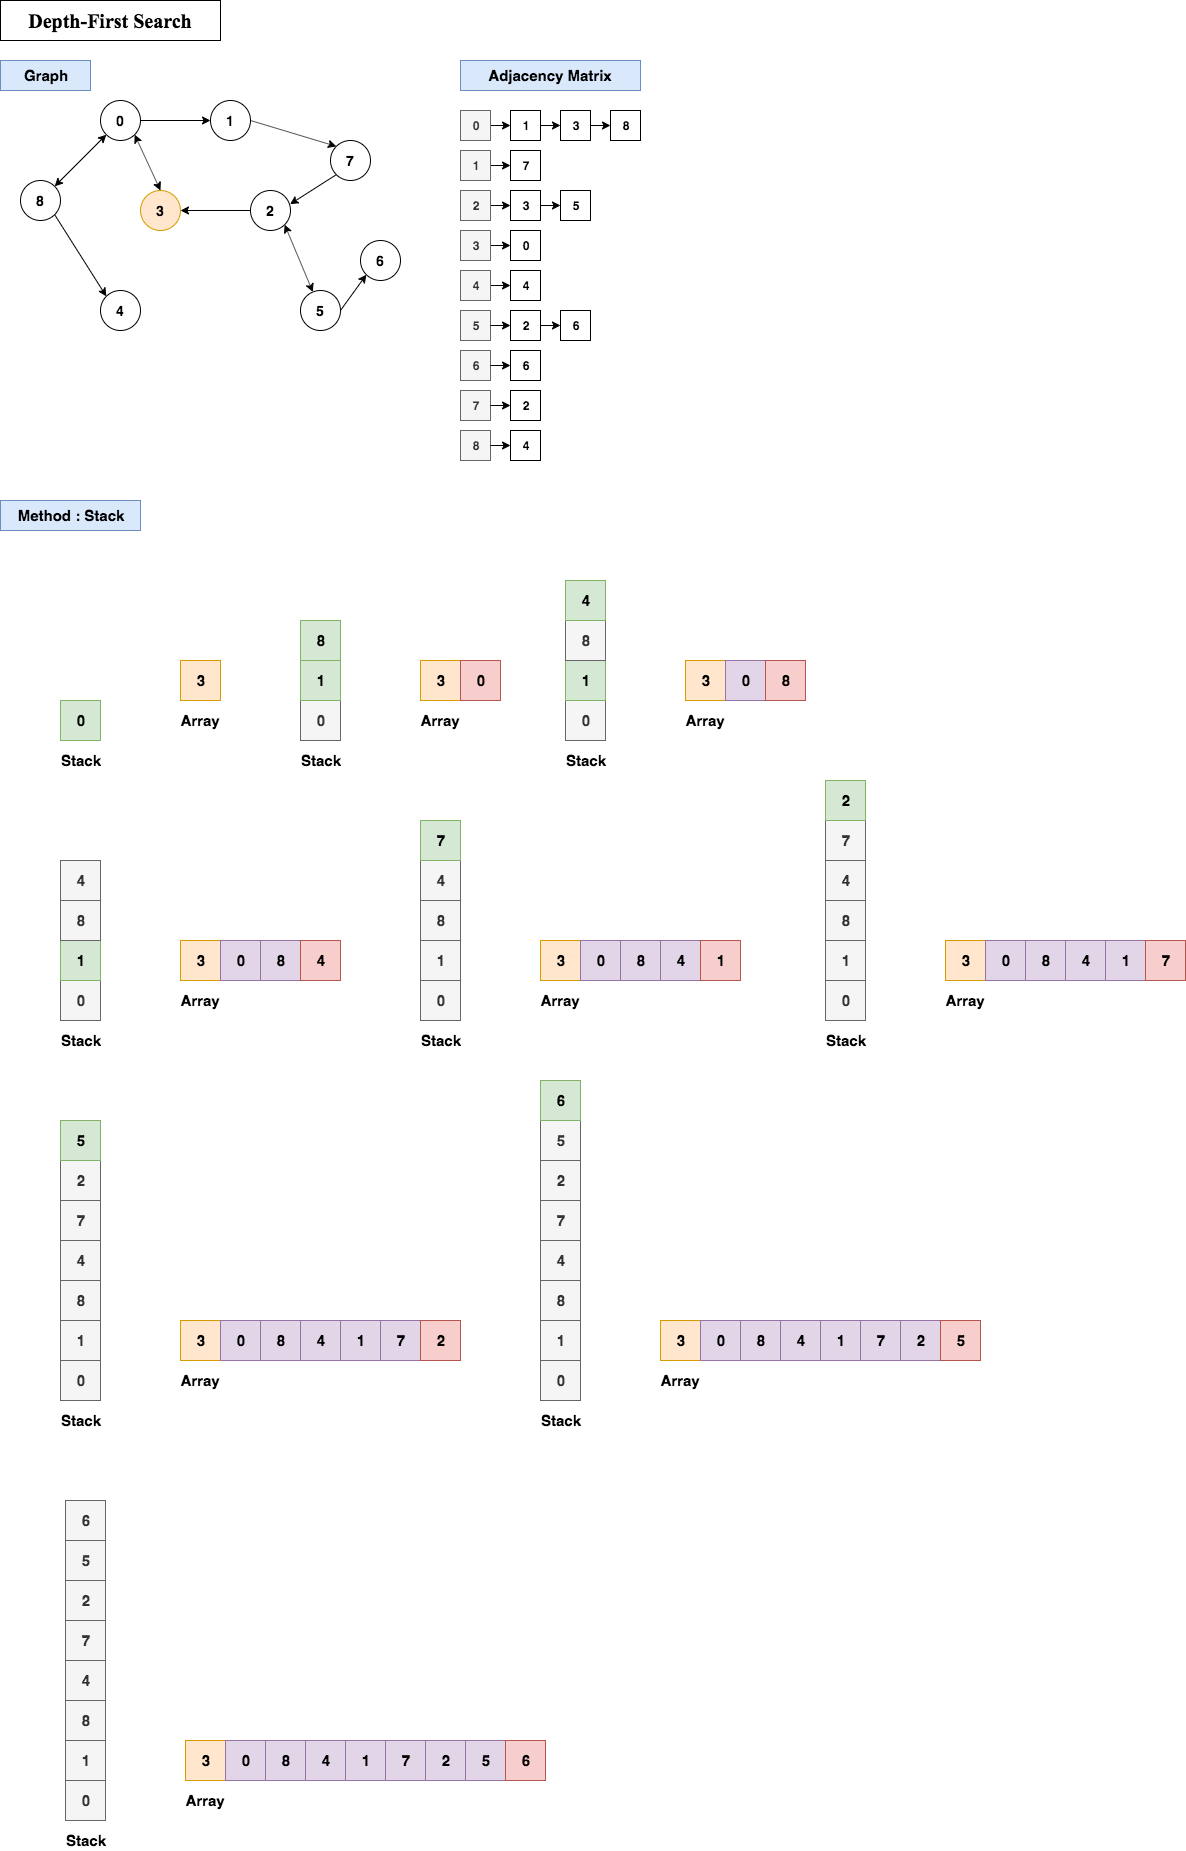

In [2]:
from IPython.display import Image
Image(filename = "DFS.png", height = 1000, width = 1500)

## 我對DFS的想法：

1. 以Stack來實現Graph的走訪。
2. 設計一個Stack和一個Array:
    + Stack: 存放尚未被造訪的節點。
    + Array: 一個是已走訪過的Node，且預設第一個是起點。
3. 邏輯:
    + 起點加入Array。
    + 查看和起點有直接連接的Node，並加入Stack。
        + 將Stack的TopNode加入Array，並且Pop掉。
        + 查看和TopNode有直接連接的Node，有且從未走訪過的Node，加入Stack。
        + 不斷重複，直到Stack沒有Node。
4. 重點在於：
    + 每次都是將Stack的TopNode加入Array，同時要去查找和Stack的TopNode相鄰且未被走訪過的Node並加入Stack。
    

## BFS 和 DFS的比較

1. BFS和DFS的走訪都是Root > Left > Right:
    + BFS的走訪是屬於Level-Order Traversal，雖說都是先左後右，但是要將一層遍歷完後才能往下一層探訪，所以當我希望能層層訪問時，Queue的先進先出就能滿足我的需求，當從Root走訪時，LeftChild先被加入暫存Queue，而後RightChild加入暫存Queue，當我再走訪到LeftChild時，LeftChild就能先被取出，而若用Stack則會先取出RightChild。
    + DFS的走訪是屬於Pre-Order Traversal，也是先左後右，但是須先將每一個Node的ChildNode探訪完畢後，才能再回上層Node再往下探訪，就是先走深再走廣，當我希希望我能先走到各層時，不管該層有沒有走訪完，先往深探詢就可以用Stack，因為Stack是屬於先進後出的類型，我每次取出我最後一個走訪的點(最深最遠的點)即可，再回來探究每一層未被走訪的點。


2. BFS的廣度優先和DFS的深度優先:
    + BFS搜尋時優先看重階層，屬於一層層外擴的形式。以走迷宮為例就是，會由起點向旁邊的空格擴散直到終點。
    + DFS搜尋時優先看重挖得夠深，屬於是一條路走到死路再回頭的類型，以走迷宮為例就是先隨便挑一條路，然後走到底撞到牆再回來走另一條，然後跟終點最短的那條就是最佳路徑。


3. BFS和DFS的應用:
    看到一篇文章將利用資料夾的階層來講BFS和DFS
    + BFS: 電腦使用者是一個不整理檔案，檔案就是全部放在一起不分類，用BFS很適合。
    + DFS: 電腦使用者是一個很會整理檔案，把檔案都放在資料夾裡而且資料夾很多層，那用DFS很適合。
    + 所以真的用BFS還是DFS還是要看資料特性，看怎麼樣效益最大。


4. BFS和DFS的時間複雜度:(V是Vertex，E是Edge)
    + 最差時間複雜度: O(V+E) (每個點和邊都要走訪一次)
    + 最佳時間複雜度: O(1) (第一個點就是要找的點)
    + 平均時間複雜度: O(V+E)
    

5. BFS和DFS都是屬於貪婪演算法(Greedy Algorithm):
    
    我個人覺得Greedy Algorithm很有趣哈哈哈，因為我覺得這個很像人生中在做選擇時使用的方法。
    
    Greedy Algorithm就是將一個問題拆成多個子問題，並將所有子問題的區域最佳解遞推回去來逼近全域最佳解，從而希望得到最好的效果，包含MST也是屬於Greedy Algorithm。BFS和DFS之所以是Greedy Algorithm主要是因爲搜尋起點的不同會導致搜尋出來結果不同，因此未必是最好的結果，而是在該情況下最快搜尋出來的結果。

    


## 程式碼

之前以array的形式寫好的Queue和Stack，直接拿來用。

In [3]:
class Stack:

    def __init__(self):
        self.stack = []
        
    def push(self, x: int) -> None:
        self.stack.append(x)
    
    def pop(self) -> None:
        self.stack.pop()
        
    def top(self) -> int:
        return self.stack[-1]
    
    def IsEmpty(self):
        if len(self.stack) == 0:
            return True
        else:
            return False
        
    def getSize(self):
        return len(self.stack)
        


In [4]:
class Queue:

    def __init__(self):
        self.array = []

    def push(self, x: int) -> None:
        self.array.append(x)

    def pop(self) -> int:
        self.array.pop(0)
        
    def getFront(self) -> int:
        return self.array[0]
    
    def getBack(self):
        return self.array[-1]
        
    def IsEmpty(self) -> bool:
        if len(self.array) == 0:
            return True
        else:
            return False
    
    def getSize(self):
        return len(self.array)

In [5]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        Queue1, Queue2 = Queue(), Queue() # 創建兩個Queue，Queue1是暫存空間，Queue2是儲存已走訪過的Node
        start = s
        for k in range(len(self.graph)): # 遍歷Graph的所有點
            Queue2.push(start) # 將起點放入Queue2
            for i in self.graph[start]: 
                if (i not in Queue1.array) and (i not in Queue2.array):
                    Queue1.push(i) # 把起點的鄰點且尚未被走訪過的Node放入Queue1
            if len(Queue1.array) != 0:
                start = Queue1.array[0] # 將起點更新為Queue1的第一個
                Queue1.pop() # 並將它從Queue1消除
            else:
                break
        return Queue2.array

    def DFS(self, s):
        Stack1 = Stack() # Stack是暫存空間
        array_DFS = [] # array_DFS是儲存已走訪過的Node
        start = s
        for k in range(len(self.graph)):
            array_DFS.append(start)
            for i in self.graph[start]:
                if (i not in Stack1.stack) and (i not in array_DFS):
                    Stack1.push(i) # 把起點的鄰點且尚未被走訪過的Node放入Stack1
            if len(Stack1.stack) != 0:
                start = Stack1.top() # 將起點更新為Stack1的最上面那個
                Stack1.pop() # 並將它從Stack1移除
            else:
                break
                
        return array_DFS     

In [6]:
x = Graph()
x.addEdge(1,2)
x.addEdge(1,3)
x.addEdge(2,2)
x.addEdge(3,3)
# g.addEdge("A","B")
# g.addEdge("A","D")
# g.addEdge("B","C")
# g.addEdge("B","F")
# g.addEdge("C","E")
# g.addEdge("C","G")
# g.addEdge("C","H")
# g.addEdge("G","E")
# g.addEdge("G","H")
# g.addEdge("E","B")
# g.addEdge("E","F")
# g.addEdge("F","A")
# g.addEdge("D","F")
# g.addEdge("H","A")

In [7]:
len(x.graph)

3

In [8]:
x.graph

defaultdict(list, {1: [2, 3], 2: [2], 3: [3]})

In [9]:
print(x.DFS(1)) 
print(x.BFS(1)) 

[1, 3, 2]
[1, 2, 3]
